### **Problem Statement**
In this project, the goal is to develop a **machine learning model** that can accurately predict whether a loan applicant poses a risk for default or not, based on their demographic, financial, and professional attributes. This prediction is crucial for financial institutions to minimize losses, make informed lending decisions, and enhance overall operational efficiency. 

---

### **Objective**
As part of this project, my objective is to:

1. **Analyze and Understand the Dataset**: Perform a comprehensive exploratory data analysis (EDA) to uncover patterns, relationships, and key factors that influence loan default risk.

2. **Build a Predictive Model**: Develop a machine learning model that predicts the `Risk_Flag` (loan default risk) using features such as income, age, marital status, house ownership, job experience, and other relevant attributes.

3. **Handle Real-World Challenges**:
   - Address class imbalance in the target variable to ensure fair and accurate predictions.
   - Engineer features to enhance the model's ability to capture complex relationships between attributes.

4. **Evaluate and Optimize the Model**: Assess the model's performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score, and ROC-AUC) and optimize it through hyperparameter tuning.

5. **Deploy the Model**: (Optional) Deploy the trained model to a web or cloud-based platform to provide real-time predictions for loan approval decisions.

6. **Provide Actionable Insights**: Highlight key features and patterns that influence loan risk, enabling stakeholders to make data-driven decisions.

---

### **My Perspective**
This project not only aims to solve a real-world problem but also serves as an opportunity to apply machine learning skills, work with a diverse dataset, and tackle challenges like class imbalance, feature engineering, and model interpretability. Ultimately, the goal is to create a robust and scalable solution that adds value to financial decision-making processes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_json("loan_approval_dataset.json.zip")
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [2]:
df.shape       # sample size is 2 lakh 52 thousand and 13 features in a dataset.

(252000, 13)

### Feature Explanation

1. **Id**: A unique identifier for each applicant; not relevant for modeling or insights.
2. **Income**: The total annual income of the applicant; a key indicator of financial capability.
3. **Age**: The age of the applicant; helps gauge life stage and earning potential.
4. **Experience**: The number of years of work experience; reflects job stability and skill level.
5. **Married/Single**: The marital status of the applicant; could influence financial obligations and dependents.
6. **House_Ownership**: Indicates whether the applicant owns, rents, or lives in other housing; reflects financial stability.
7. **Car_Ownership**: Whether the applicant owns a car; an indicator of lifestyle and affordability.
8. **Profession**: The job title or profession of the applicant; helps assess income reliability and risk.
9. **CITY**: The city where the applicant resides; may reflect cost of living and regional economic conditions.
10. **STATE**: The state where the applicant resides; similar to the city, can indicate regional factors.
11. **CURRENT_JOB_YRS**: Number of years in the current job; indicates job stability and career consistency.
12. **CURRENT_HOUSE_YRS**: Number of years living in the current house; shows residential stability.
13. **Risk_Flag**: The target variable indicating loan approval risk (1 for high risk, 0 for low risk).



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [4]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [5]:
df.isnull().sum()    # no null values are present in a dataset

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [6]:
df['Id'].nunique()  # all id are unique

252000

# Univariate Analysis
Visualize distributions of numerical and categorical features.

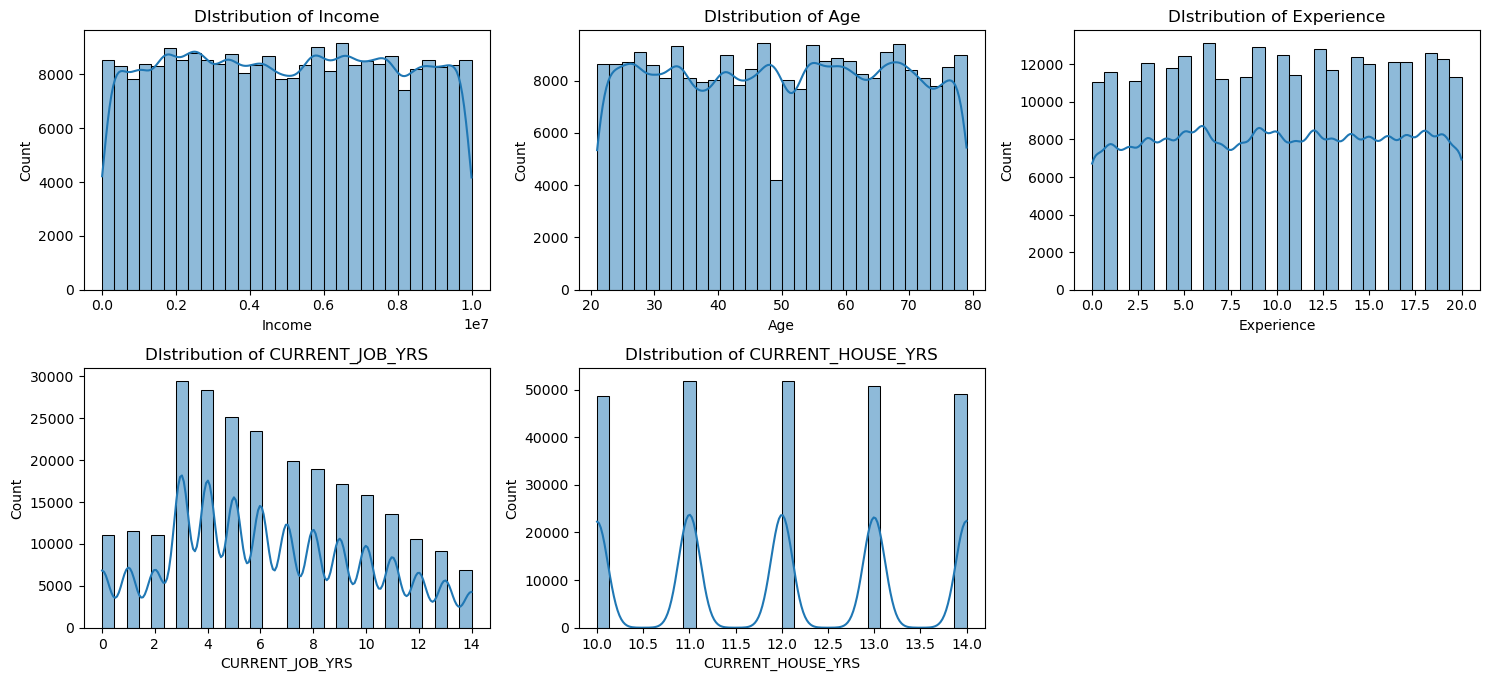

In [7]:
# Numerical features Plot distribution
numerical_columns = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

plt.figure(figsize=(15,20))
for i, col in enumerate(numerical_columns,1):
    plt.subplot(6,3,i)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(f"DIstribution of {col}")

plt.tight_layout()
plt.show()

- **Insights from above Histograms**
- **Income** : From the histogram of **Income**, it appears that the income distribution is relatively uniform with no significant peaks or drops across the range. This indicates a diverse dataset with applicants earning across various income levels. For modeling, this feature might not need transformation but could still benefit from scaling to standardize its range.

- **AGE** : From the histogram of **Age**, the distribution is fairly uniform across the range of 20 to 80 years, with minor variations. Peaks suggest clusters of applicants at specific ages (e.g., multiples of 10 or common retirement ages). This indicates diverse age groups among applicants, which could help capture differences in loan risk associated with life stages.
  
- **Experieance** : From the histogram of **Experience**, the distribution shows a fairly even spread across the range of 0 to 20 years, with noticeable peaks around specific values (e.g., 5, 10, 15 years). This suggests a diverse dataset of applicants with varying levels of work experience. The feature may be useful in determining risk, as more experienced individuals could have greater financial stability.
  
- **Current_Job_Years** : From the histogram of **CURRENT_JOB_YRS**, most applicants have been in their current job for around 3 to 6 years, with a declining trend as the years increase. This indicates that a majority of individuals have moderate job tenure, which could be indicative of stability. Longer tenure might reflect greater financial security, making this a potentially significant feature for predicting loan risk.
  
- **Current_House_Year** : From the histogram of **CURRENT_HOUSE_YRS**, the distribution shows clear spikes at specific values (10, 11, 12, 13, 14 years), indicating that most applicants have lived in their current house for these durations. This might be due to standardized reporting or common tenancy agreements. Longer residence could signify stability, which may correlate with lower loan default risk.

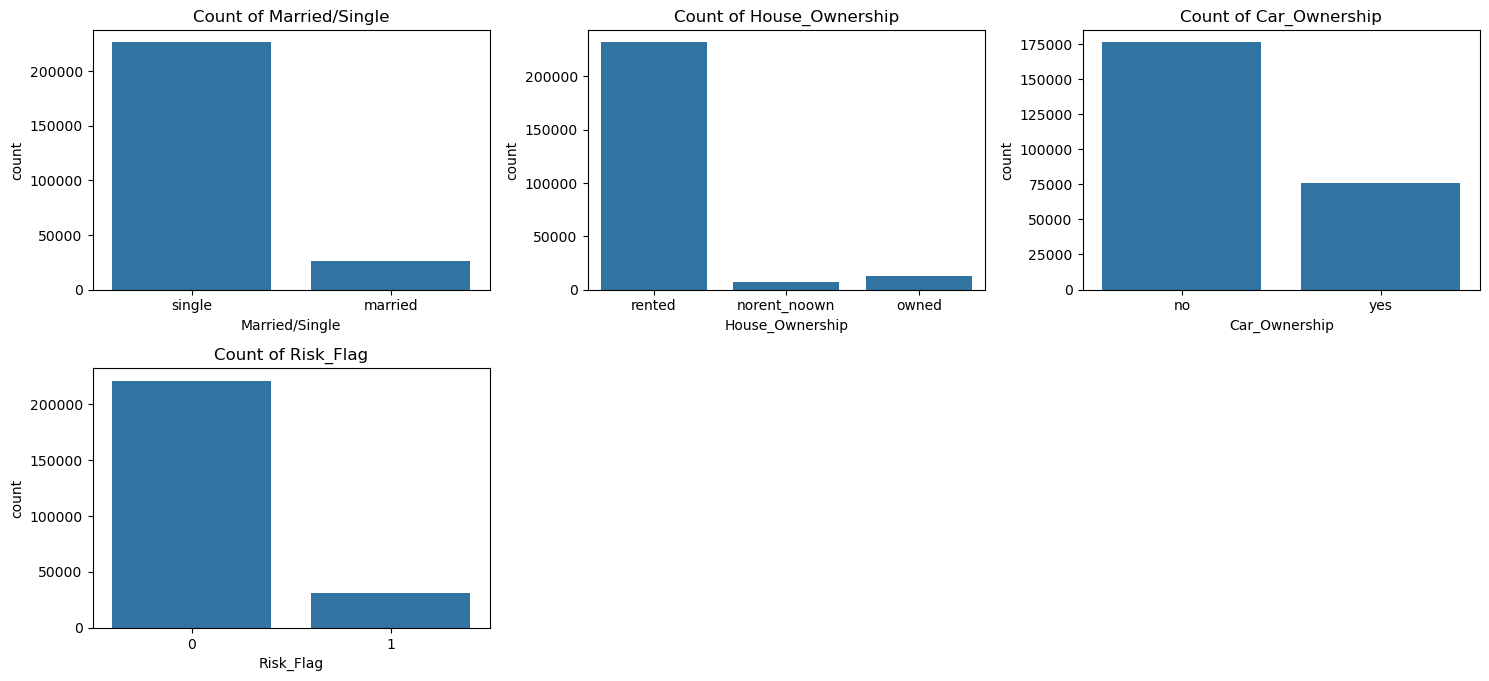

In [8]:
# categorical feature count plot
categorical_columns=['Married/Single', 'House_Ownership', 'Car_Ownership', 'Risk_Flag']

plt.figure(figsize=(15,20))
for i, col in enumerate(categorical_columns,1):
    plt.subplot(6,3,i)
    sns.countplot(data=df,x=col)
    plt.title(f"Count of {col}")

plt.tight_layout()
plt.show()

### Insights from Categorical Distributions:

1. **Married/Single**: The majority of applicants are single, suggesting that marital status might play a minor role in risk evaluation.

2. **House_Ownership**: Most applicants live in rented housing, with very few owning homes. This indicates that renting may not be strongly associated with financial risk.

3. **Car_Ownership**: A significant proportion of applicants do not own cars, which might reflect affordability and lifestyle.

4. **Risk_Flag**: The dataset shows a clear imbalance, with the majority classified as low-risk (`0`). This imbalance requires careful handling to ensure accurate predictions.

# Bivariate Analysis
- Analyze relationships between features and the target variable (Risk_Flag).

### Numerical feature VS target feature(Risk_Flag)

In [9]:
numerical_columns = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

C:\Users\HP\AppData\Local\Temp\ipykernel_7872\2197171188.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Risk_Flag',y=col,palette = 'coolwarm')
C:\Users\HP\AppData\Local\Temp\ipykernel_7872\2197171188.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Risk_Flag',y=col,palette = 'coolwarm')
C:\Users\HP\AppData\Local\Temp\ipykernel_7872\2197171188.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Risk_Flag',y=col,palette = 'coolwarm')
C:\Users\HP\AppData\Local\Temp\ipykernel_7872\2197171188.py:4: FutureW

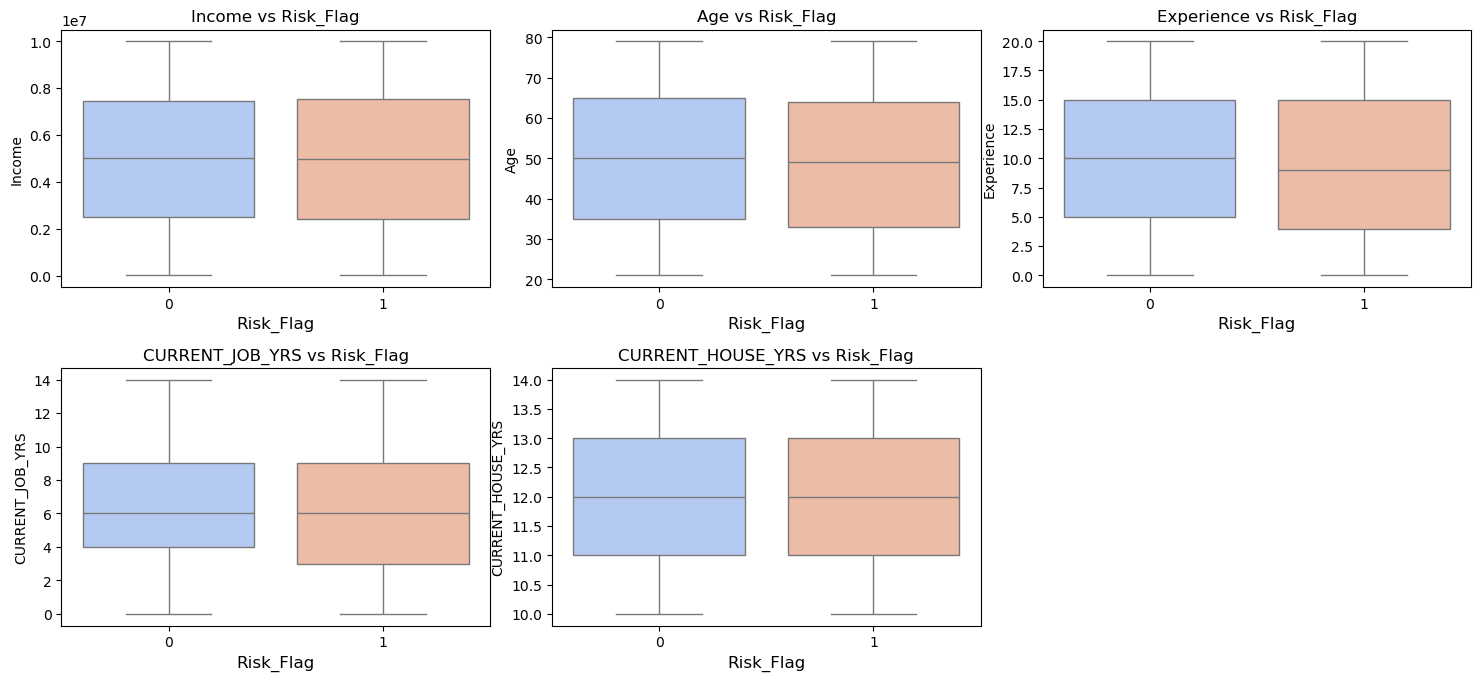

In [10]:
plt.figure(figsize=(15,20))
for i,col in enumerate(numerical_columns,1):
    plt.subplot(6,3,i)
    sns.boxplot(data=df,x='Risk_Flag',y=col,palette = 'coolwarm')
    plt.title(f'{col} vs Risk_Flag',fontsize=12)
    plt.xlabel('Risk_Flag', fontsize=12)
    plt.ylabel(col,fontsize=10)

plt.tight_layout()
plt.show()

### Insights from Numerical Features vs. Risk_Flag:

1. **Income vs. Risk_Flag**:
   - No significant difference in income distribution between low-risk (0) and high-risk (1) applicants.
   - Suggests that income alone may not be a strong predictor of loan risk.

2. **Age vs. Risk_Flag**:
   - Age distributions are quite similar across both risk groups, with slightly younger applicants in the high-risk category.
   - Age might have a minimal influence on predicting risk.

3. **Experience vs. Risk_Flag**:
   - High-risk applicants tend to have slightly less work experience on average compared to low-risk applicants.
   - Experience could contribute marginally to risk assessment.

4. **CURRENT_JOB_YRS vs. Risk_Flag**:
   - High-risk applicants show a slightly lower job tenure compared to low-risk applicants.
   - Stability in job tenure might be a useful indicator of reduced risk.

5. **CURRENT_HOUSE_YRS vs. Risk_Flag**:
   - Both risk groups have similar distributions in terms of current house tenure.
   - This feature might not be very predictive of loan risk.

### Conclusion:
Features like **Experience** and **CURRENT_JOB_YRS** show slight differences between the risk groups, suggesting they may play a role in predicting risk. However, features like **Income** and **CURRENT_HOUSE_YRS** seem less impactful. Further feature engineering or combining features might enhance their predictive power.

### Categorical feature VS target feature(Risk_Flag)

In [11]:
categorical_columns=['Married/Single', 'House_Ownership', 'Car_Ownership']

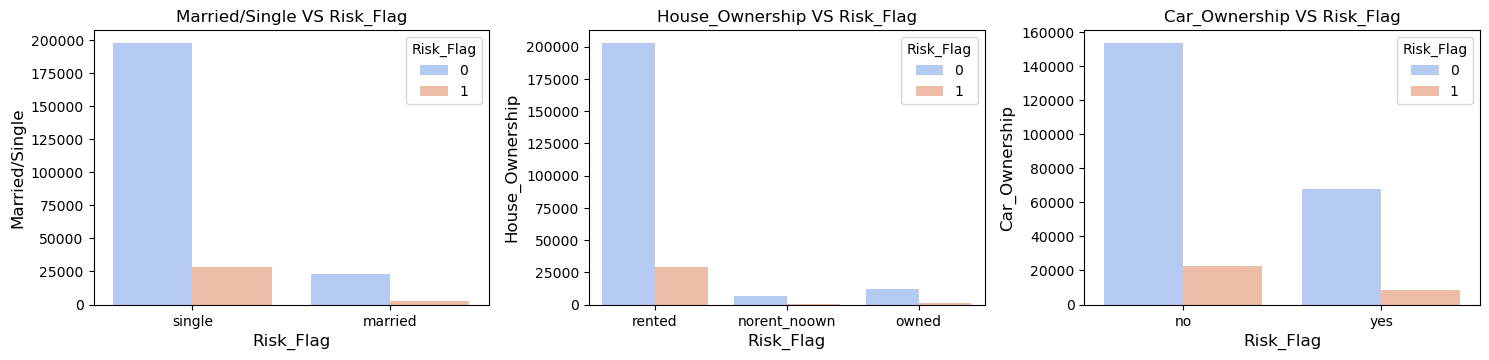

In [12]:
plt.figure(figsize=(15,20))
for i,col in enumerate(categorical_columns,1):
    plt.subplot(6,3,i)
    sns.countplot(x=col, hue='Risk_Flag',data=df,palette='coolwarm')
    plt.title(f'{col} VS Risk_Flag')
    plt.xlabel('Risk_Flag',fontsize=12)
    plt.ylabel(col,fontsize=12)

plt.tight_layout()
plt.show()

### Insights from Categorical Features vs. Risk_Flag:

1. **Married/Single vs. Risk_Flag**:
   - Single applicants dominate both the low-risk (0) and high-risk (1) categories.
   - Married individuals are significantly fewer, and they also show lower high-risk counts.
   - Marital status might be less influential in distinguishing risk levels.

2. **House_Ownership vs. Risk_Flag**:
   - The majority of applicants live in rented accommodations, and this trend is consistent across both risk categories.
   - Applicants who own homes show very low high-risk counts, indicating home ownership could be associated with financial stability and reduced risk.

3. **Car_Ownership vs. Risk_Flag**:
   - Applicants without cars dominate both risk categories.
   - However, car ownership is slightly more prevalent in the low-risk group, which could indicate a minor correlation between owning a car and lower financial risk.

### Conclusion:
House ownership seems to have the most potential as a predictive factor for assessing loan risk, while marital status and car ownership show weaker distinctions between risk groups. These insights can guide feature selection and engineering in the modeling process.

In [13]:
df.head(1)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0


# Risk_Flag vs Professions

In [14]:
# top 10 professions.
top_10_professions=df['Profession'].value_counts().head(10).index
top_10_professions

Index(['Physician', 'Statistician', 'Web_designer', 'Psychologist',
       'Computer_hardware_engineer', 'Drafter', 'Magistrate',
       'Fashion_Designer', 'Air_traffic_controller', 'Comedian'],
      dtype='object', name='Profession')

In [15]:
# We can filtered the dataframe for only top 10 professions
filtered_df = df[df['Profession'].isin(top_10_professions)]
filtered_df.head(3)


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
12,13,9120988,28,9,single,rented,no,Physician,Erode[17],Tamil_Nadu,9,12,0
16,17,7315840,71,8,married,rented,no,Air_traffic_controller,Kamarhati,West_Bengal,8,14,0
27,28,9643150,24,13,single,rented,no,Comedian,Indore,Madhya_Pradesh,6,14,0


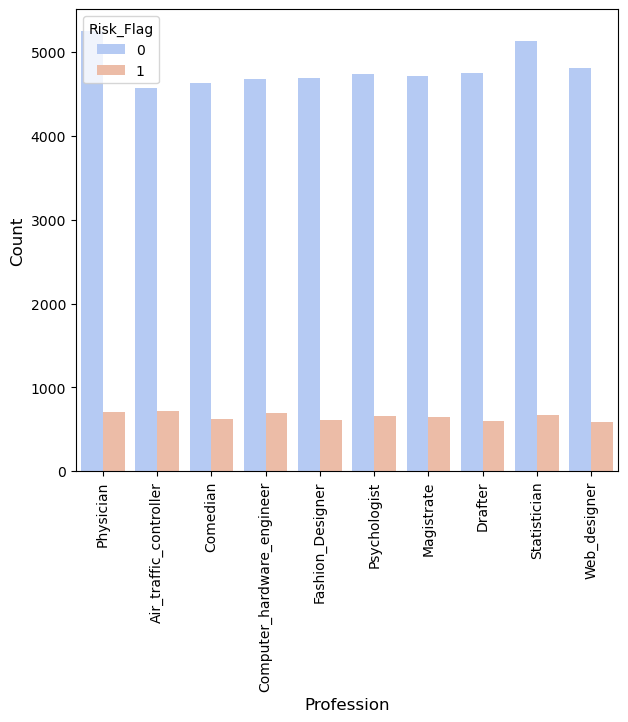

In [16]:
# Countplot
plt.figure(figsize=(7,6))
sns.countplot(data=filtered_df,x='Profession',hue='Risk_Flag',palette='coolwarm')
plt.xlabel('Profession', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.show()

### Insights from Professions vs. Risk_Flag:

1. **Physicians and Statisticians**: These professions dominate the low-risk category, indicating strong financial stability.

2. **Other Professions (e.g., Web Designer, Drafter, Magistrate)**: These also show a similar trend, with low high-risk counts, highlighting consistent financial reliability.

3. **High-Risk Consistency**: The proportion of high-risk (1) applicants remains relatively low across all professions, showing that profession alone might not be a strong differentiator for risk. 

4. **Balanced Trends**: Professions related to technical and professional roles tend to align with low-risk behavior.

# Risk_Flag vs STATE

In [17]:
top_10_State = df['STATE'].value_counts().head(10).index
top_10_State 

Index(['Uttar_Pradesh', 'Maharashtra', 'Andhra_Pradesh', 'West_Bengal',
       'Bihar', 'Tamil_Nadu', 'Madhya_Pradesh', 'Karnataka', 'Gujarat',
       'Rajasthan'],
      dtype='object', name='STATE')

In [18]:
filtered_state = df[df['STATE'].isin(top_10_State)]
filtered_state.head(3)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


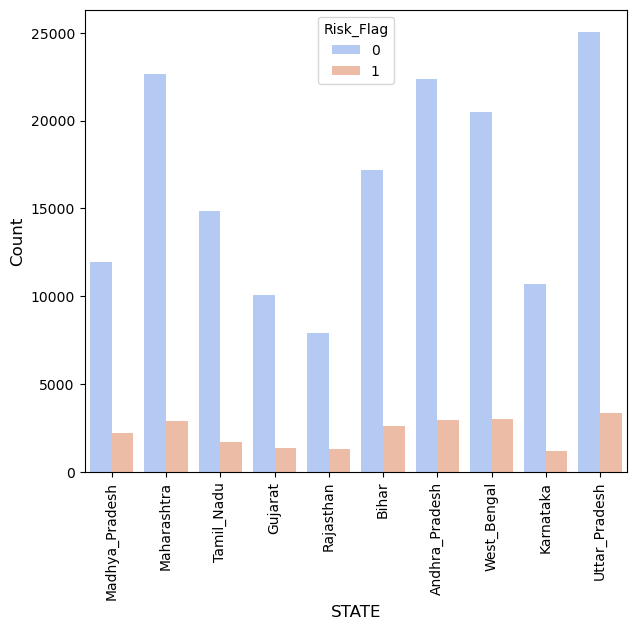

In [19]:
plt.figure(figsize=(7,6))
sns.countplot(data=filtered_state,x='STATE',hue='Risk_Flag',palette='coolwarm')
plt.xlabel('STATE', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.show()

### Insights from State-wise Distribution vs. Risk_Flag:

1. **Uttar Pradesh, Madhya Pradesh, and Maharashtra**:
   - These states have the highest number of applicants, both in low-risk (0) and high-risk (1) categories.
   - High population states naturally contribute to more applicants.

2. **Bihar and Andhra Pradesh**:
   - Show a relatively higher proportion of high-risk applicants compared to other states.
   - Could indicate regional financial instability or economic challenges.

3. **Tamil Nadu and Gujarat**:
   - Exhibit lower overall applicant counts with a small proportion of high-risk individuals, suggesting relatively stable profiles.

4. **West Bengal and Karnataka**:
   - Maintain a balanced trend with fewer high-risk applicants.

### Conclusion:
Regional economic conditions may influence the proportion of high-risk applicants, making the `STATE` variable a potentially significant feature for predicting loan risk.

# Multivariate Analysis
Analyze interactions between multiple features.

In [20]:
numerical_columns = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

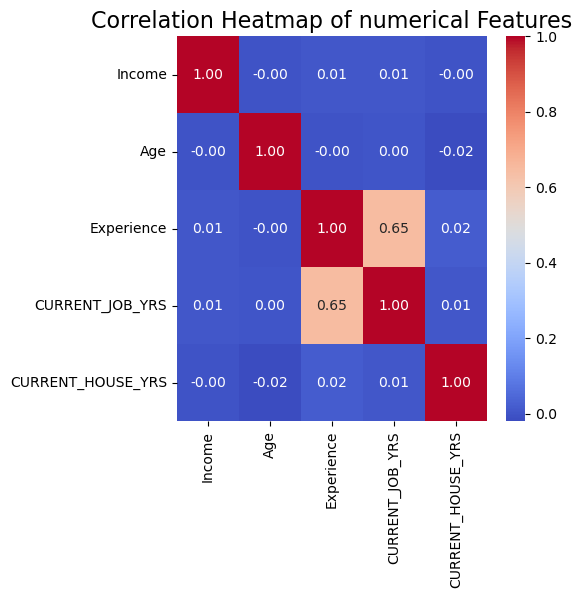

In [21]:
plt.figure(figsize=(5,5))
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm")
plt.title('Correlation Heatmap of numerical Features',fontsize=16)
plt.show()

### Insights from the Correlation Heatmap:

1. **Strong Correlation**:
   - **Experience and CURRENT_JOB_YRS** show a significant positive correlation (~0.65), indicating that applicants with longer experience tend to have longer job tenures.
   - This relationship makes sense as professional experience often correlates with job stability.

2. **Weak/Negligible Correlation**:
   - Most features, including **Income**, **Age**, and **CURRENT_HOUSE_YRS**, show very weak or near-zero correlations with each other and other numerical features.
   - This suggests that these features might be largely independent and may not directly influence each other.

3. **Potential Feature Redundancy**:
   - **Experience** and **CURRENT_JOB_YRS** have a high correlation, indicating potential redundancy. It might be worth testing model performance by including only one of these features to reduce multicollinearity.

### Conclusion:
The weak correlations between most features indicate that they contribute independent information, which can be useful for prediction. However, the high correlation between **Experience** and **CURRENT_JOB_YRS** warrants further analysis during feature selection to avoid redundancy.

In [22]:
# Define pairs of categorical columns to plot
pairs = [
    ('House_Ownership', 'Car_Ownership'),
    ('Married/Single', 'Car_Ownership'),
    ('House_Ownership', 'Married/Single'),
    ('Risk_Flag', 'Car_Ownership')
]

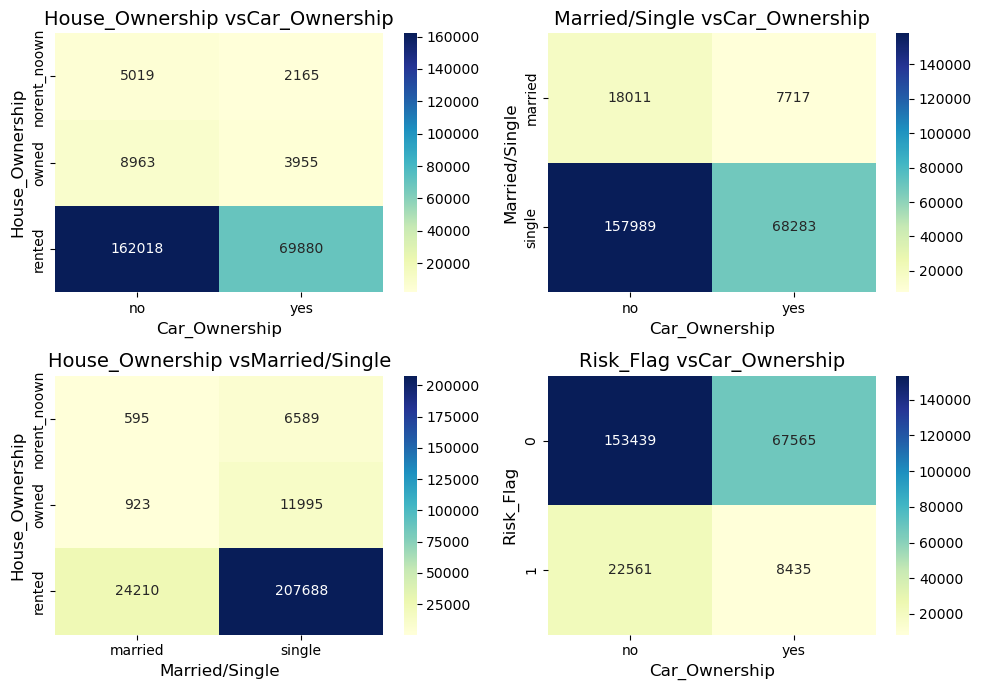

In [23]:
plt.figure(figsize=(10,7))

for i,(col1,col2) in enumerate(pairs,1):
    plt.subplot(2,2,i)
    sns.heatmap(pd.crosstab(df[col1],df[col2]),annot=True,fmt='d',cmap="YlGnBu")
    plt.title(f'{col1} vs{col2}',fontsize=14)
    plt.xlabel(col2,fontsize=12)
    plt.ylabel(col1,fontsize=12)

plt.tight_layout()
plt.show()

### Insights from Categorical Feature Interactions:

1. **House_Ownership vs. Car_Ownership**:
   - A majority of applicants live in rented accommodations and do not own a car.
   - Among those who own cars, rented accommodations still dominate, indicating that car ownership is not tied strongly to homeownership.

2. **Married/Single vs. Car_Ownership**:
   - Single applicants significantly outnumber married ones, regardless of car ownership.
   - Married applicants owning cars are relatively fewer, suggesting a potential financial pattern for married households.

3. **House_Ownership vs. Married/Single**:
   - Single applicants are mostly renters, while married applicants are proportionately more likely to own a home.
   - Renting dominates across both marital statuses.

4. **Risk_Flag vs. Car_Ownership**:
   - High-risk individuals are more likely to not own a car.
   - Low-risk individuals are better distributed between car ownership and non-ownership, but non-ownership still dominates.

### Conclusion:
Key patterns suggest that **home renting** and **lack of car ownership** are prevalent across the dataset. These traits are especially common among high-risk individuals, which could indicate financial constraints associated with these groups.

# Advanced Feature Insights
- Identify potential outliers, skewness, and important feature interactions.

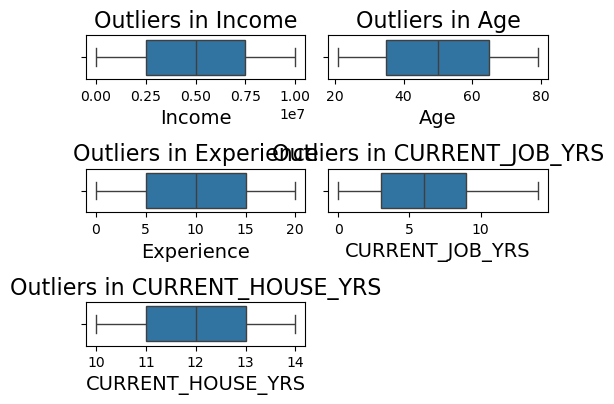

In [24]:
plt.figure(figsize=(5,5))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)  # Create a grid of subplots (4 rows, 2 columns)
    sns.boxplot(data=df, x=col)
    plt.title(f'Outliers in {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show all plots together


In [25]:
# Skewness and kurtosis
for col in numerical_columns:
    skewness = df[col].skew()
    kurtosis = df[col].kurt()
    print(f'{col} - Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}')


Income - Skewness: 0.01, Kurtosis: -1.20
Age - Skewness: -0.01, Kurtosis: -1.20
Experience - Skewness: -0.01, Kurtosis: -1.19
CURRENT_JOB_YRS - Skewness: 0.27, Kurtosis: -0.79
CURRENT_HOUSE_YRS - Skewness: 0.01, Kurtosis: -1.27




---

**Important Features**  
Based on the insights gained from our EDA process, the following features have been identified as important for classifying customers as low-risk or high-risk:  
- **Experience**  
- **Current Job Years (CURRENT_JOB_YRS)**  
- **House Ownership**  
- **State (STATE)**  
- **Income**  
- **Age**  
- **Current House Years (current_house_years)**  



In [26]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
